# ECE 435-535 Computation HW2: PCA

### Name: Amir Reza Vazifeh

### Import required Python packages

In [1]:
# Import additional packages if needed
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
from scipy.io import loadmat
from sklearn import svm
from sklearn.decomposition import PCA

%matplotlib inline

### YALE B Dataset

You will use the YALE B face dataset to explore PCA. The Yale B dataset contains frontal face images (size 192 x 168) of 38 subjects, with around 64 images per subject (not all subjects have the same number of images). The total number of images is 2,414. The images have been column-wise vectorized into 192 x 168 = 32,256 column vectors and stored as the columns of a matrix X. The corresponding 2,414 labels, ranging from 1 to 39 (no 14), are provided in a row vector Y. For background and additional reading, see http://research.microsoft.com/pubs/132810/PAMI-Face.pdf.

### Display Some Images

In [2]:
# This cell is given. You do not need to modify it.

# Functions to represent the image as a matrix or a column vector
def packcw(A):
    return (A.T).reshape(-1,1)

def unpackcw(x,nr):
    return x.reshape(-1,nr).T

0) Load the YALEBXF.mat face data and display the first image of 38 subjects on a 5 x 8 tile.  
(This part is done as an example)

Train Data: 32256 x 1520
Test Data: 32256 x 894
(1520,)
(32256, 2414)
(1, 2414)


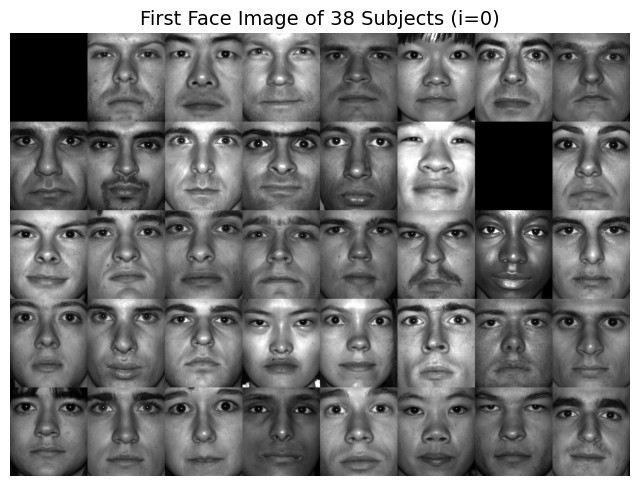

In [3]:
# This cell is given. You do not need to modify it.
# You can reuse this code for other questions below but
# reference its source: ECE_4/535_codebase_ramadge.

# Load the YALE database
# Train data (X_train): 32256 x 1520 (40 examples for 38 subjects)
# Train label (Y_train): 1520 x 1 (38 subjects (0 ~ 37))
# Test data (X_test): 32256 x 894 (Test examples vary for different subjects)
# Test label (Y_test): 894 x 1 (38 subjects (0 ~ 37))

YALE = loadmat('/content/sample_data/YALEBXF.mat')
X = YALE['X']/255.0
Y = YALE['Y']
nr, nc = 192, 168 # height = 192, width = 168
dim = nr * nc     # dimension = 32256
nex = X.shape[1]  # Total number of examples = 2414

nFc = 38          # Total number of faces
nImg = np.zeros(nFc+2) # Numper of examples for each person
for i in range(nFc+2):
    nImg[i] = (Y==i).sum()

ntr = 40    # 40 images from each of 38 subjects for training
X_train = np.zeros((dim,nFc*ntr))
Y_train = np.zeros(nFc*ntr)
X_test = np.zeros((dim,nex-nFc*ntr))
Y_test = np.zeros(nex-nFc*ntr)

nImg_eff = nImg[np.where(nImg>0)]
nImg_test = nImg_eff - ntr
for i in range(nFc):
    X_train[:,i*ntr:(i+1)*ntr] = X[:,int(np.sum(nImg_eff[:i])):int(np.sum(nImg_eff[:i]))+40]
    Y_train[i*ntr:(i+1)*ntr] = i
    X_test[:,int(np.sum(nImg_test[:i])):int(np.sum(nImg_test[:i+1]))] = X[:,int(np.sum(nImg_eff[:i]))+40:int(np.sum(nImg_eff[:i+1]))]
    Y_test[int(np.sum(nImg_test[:i])):int(np.sum(nImg_test[:i+1]))] = i

print ('Train Data: %d x %d' %(X_train.shape[0],X_train.shape[1]))
print ('Test Data: %d x %d' %(X_test.shape[0],X_test.shape[1]))

print(Y_train.shape)
print(X.shape)
print(Y.shape)

def unpackcw(x,nr):
    return x.reshape(-1,nr).T


# Faceboard of 38 faces
faceIdx = 0 # index of face to display for each subject
Bh, Bw = 5, 8
FB = np.zeros((Bh*nr, Bw*nc))
for i in range(nFc+2):
    if nImg[i]>0:
        loc = np.where(Y==i)[1]
        x = X[:,loc[faceIdx]]
        A = unpackcw(x,nr)
        row, col = divmod(i,Bw)
        rpt, cpt = row*nr, col*nc
        FB[rpt:rpt+nr, cpt:cpt+nc] = A
plt.figure(figsize = (8,8))
plt.imshow(FB, cmap='gray')
plt.axis('off')
plt.title("First Face Image of 38 Subjects (i=%i)" %faceIdx, fontsize=14)
plt.show()

### Part I: PCA

1a）Compute the SVD of the centered training data (You can use the **np.linalg.svd( )** function).   

In [4]:
# Step 1: Calculate the mean of rows (along axis 1)
mu = np.mean(X_train, axis=1)

# Define the number of times you want to duplicate the vector
num_columns = 1520

# Duplicate the vector into different columns of a matrix
mu_matrix = np.tile(mu, (num_columns, 1)).T

# Step 2: Center the data by subtracting the mean from each data point
X_centered = X_train - mu_matrix

# Step 3: Compute the SVD of the centered data
U, S, VT = np.linalg.svd(X_centered, full_matrices=False)

# U: Left singular vectors
# S: Singular values
# VT: Right singular vectors (transpose)
# When full_matrices is set to False, the function computes a reduced SVD

1b) Plot the PCA captured **variance** of the principal
components from $1$ to $j$ (normalized by the total variance) versus index $j$ . The y axis should go from 0 to 1 with tick marks in increments of 0.05, and the let the x axis go from 1 to 256 with tick marks at 8, 16, 32, ..., 256.

In [22]:
# Note: I use training data for this section, like part 1a
# Images should be Flatten into a 2D array (number of images, height * width)
data_matrix = X_train.T

# Initialize and fit a PCA model
pca = PCA()
pca.fit(data_matrix)

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

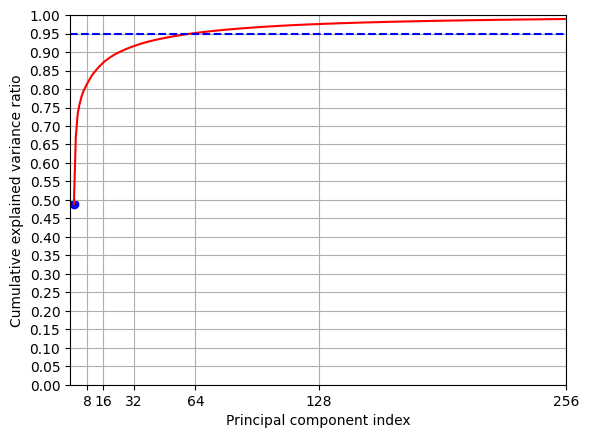

Sum of Explained Variance Ratio for Principal Components: 1.0


In [24]:
# Plotting
x = np.arange(1, 257)
y = np.zeros(256)
for i in range(1, 257):
  y[i-1] = np.sum(explained_variance_ratio[0:i])

plt.plot(x, y, color='red')

# Set the y-axis limits to 0 and 1
plt.ylim(0, 1)

# Set the y-axis ticks at increments of 0.05
y_ticks = np.arange(0, 1.05, 0.05)
plt.yticks(y_ticks)

# Set the x-axis limits from -1 to 256
plt.xlim(-1, 256)

# Generate an array of x-axis tick positions at powers of 2 from 8 to 256
x_ticks = [8 * 2**i for i in range(0, 6)]  # 8, 16, 32, 64, 128, 256
plt.xticks(x_ticks)

# Add a horizontal line at y = 0.95
plt.axhline(y=0.95, color='blue', linestyle='--', label='Horizontal Line at y=0.5')

# Create a scatter plot with the single point
plt.scatter(x[0], y[0], color='blue', marker='o', label='Single Point')

# Add labels
plt.ylabel('Cumulative explained variance ratio')
plt.xlabel('Principal component index')
plt.grid()

# Display the plot
plt.show()

# The Sum of Explained Variance Ratio for Principal Components should be zero
print("Sum of Explained Variance Ratio for Principal Components: " + str(np.sum(explained_variance_ratio)))

1c) Use you plot from part 1b) to answer the following questions:   
[i] To the nearest 5%, what fraction of total variance is captured by the first principal component? ANS: 50%  
[ii] To the nearest power of 2, how many PC's are required to capture 95% of the total variance? ANS: 64

Note: The captured variance of principal components is calculated using **training data**. If you do it for X (both train and test data), the answers to [i] will be 35%, and answer to [ii] will be 64.

2) Project the full data $X$ onto the first $d$ principal components for $d = 8,16,32,64,128,256$. Display the approximate faces for the same images from part 1) in a 5 x 8 tile. Remember to add back the mean before displaying the image.

In [25]:
def PCA_on_Images(flattened_images, d):

  # Inpus:
  # Images should be Flatten into a 2D array (number of images, height * width)
  # d is the number of principal components that for image projections

  # Output:
  # Reconstructed images after projection onto the first d principal components
  # The dimension of output is (number of images, height * width), like input

  # Step 1: Standardize the data
  mean_image = np.mean(flattened_images, axis=0)
  std_image = np.std(flattened_images, axis=0)
  standardized_images = (flattened_images - mean_image) / std_image

  # Step 2: Initialize PCA with the desired number of components
  pca = PCA(n_components=d)

  # Step 3: Fit PCA to your standardized image data
  pca.fit(standardized_images)

  # Steps 4: Project the images onto the first d principal components
  projected_data = pca.transform(standardized_images)
  # print("Projected Data Shape: " + str(np.shape(projected_data)))

  # Step 5: Reconstruct the images from the projected data
  reconstructed_images = pca.inverse_transform(projected_data)
  # print("Reconstructed Images Shape: " + str(np.shape(reconstructed_images)))

  # Step 6: Adding back the mean and multiplying to sd
  reconstructed_images = (reconstructed_images * std_image) + mean_image

  return reconstructed_images

# Source Code: ECE_4/535_codebase_ramadge
def image_plotting(X, d):
  # Faceboard of 38 faces
  faceIdx = 0 # index of face to display for each subject
  Bh, Bw = 5, 8
  FB = np.zeros((Bh*nr, Bw*nc))
  for i in range(nFc+2):
      if nImg[i]>0:
          loc = np.where(Y==i)[1]
          x = X[:,loc[faceIdx]]
          A = unpackcw(x,nr)
          row, col = divmod(i,Bw)
          rpt, cpt = row*nr, col*nc
          FB[rpt:rpt+nr, cpt:cpt+nc] = A
  plt.figure(figsize = (8,8))
  plt.imshow(FB, cmap='gray')
  plt.axis('off')
  plt.title("First Face Image of 38 Subjects with (d=%i) principal components" %d, fontsize=14)
  plt.show()



### Projecting images onto first 8 principal components



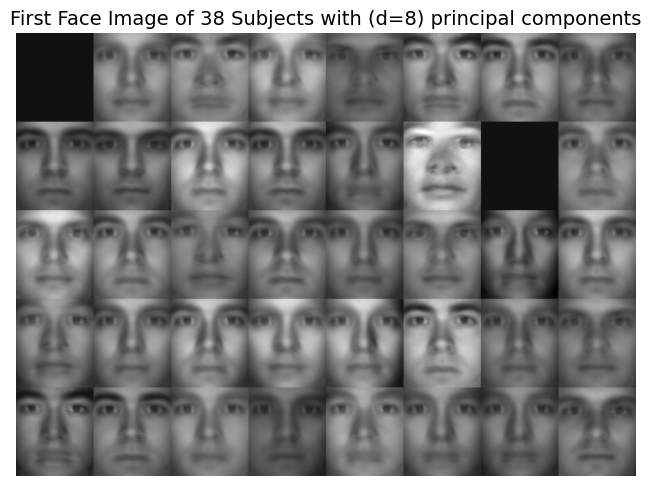

In [26]:
# Choose the number of principal components (d)
d = 8

# Projecting images onto first d principal components
reconstructed_images = PCA_on_Images(X.T, d)

# Showing reconstructed images
image_plotting(reconstructed_images.T, d)

### Projecting images onto first 16 principal components

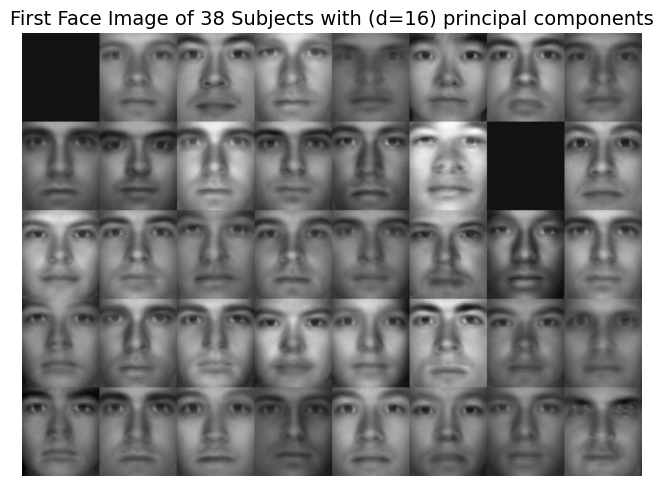

In [27]:
# Choose the number of principal components (d)
d = 16

# Projecting images onto first d principal components
reconstructed_images = PCA_on_Images(X.T, d)

# Showing reconstructed images
image_plotting(reconstructed_images.T, d)

### Projecting images onto first 32 principal components

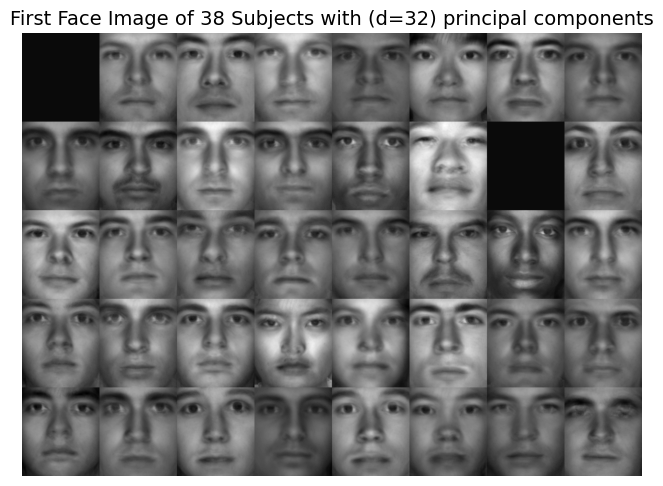

In [28]:
# Choose the number of principal components (d)
d = 32

# Projecting images onto first d principal components
reconstructed_images = PCA_on_Images(X.T, d)

# Showing reconstructed images
image_plotting(reconstructed_images.T, d)

### Projecting images onto first 64 principal components

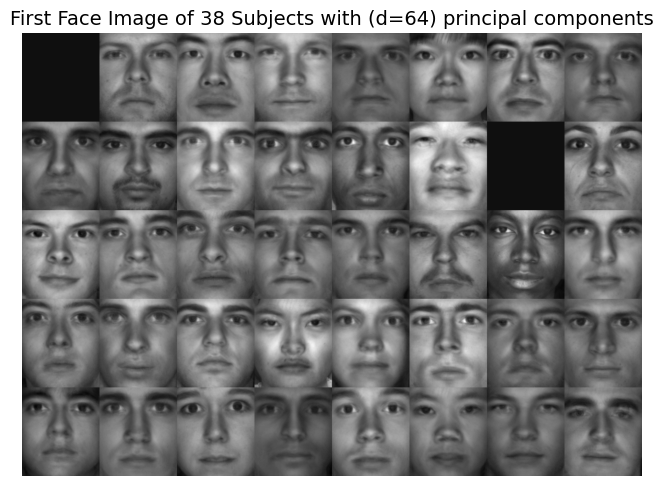

In [29]:
# Choose the number of principal components (d)
d = 64

# Projecting images onto first d principal components
reconstructed_images = PCA_on_Images(X.T, d)

# Showing reconstructed images
image_plotting(reconstructed_images.T, d)

### Projecting images onto first 128 principal components

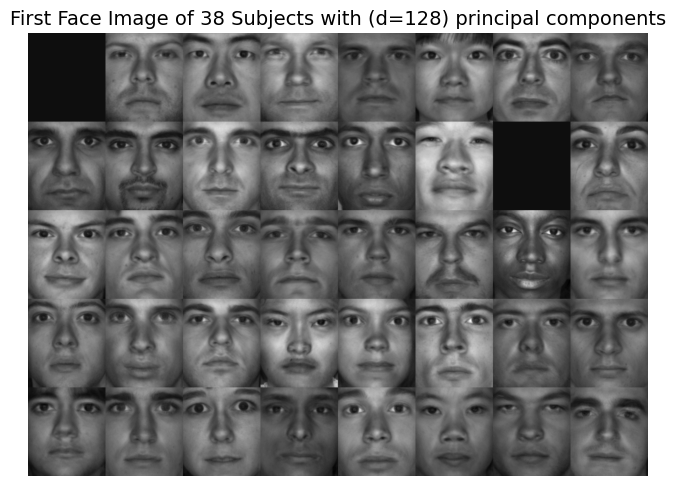

In [30]:
# Choose the number of principal components (d)
d = 128

# Projecting images onto first d principal components
reconstructed_images = PCA_on_Images(X.T, d)

# Showing reconstructed images
image_plotting(reconstructed_images.T, d)

### Projecting images onto first 256 principal components

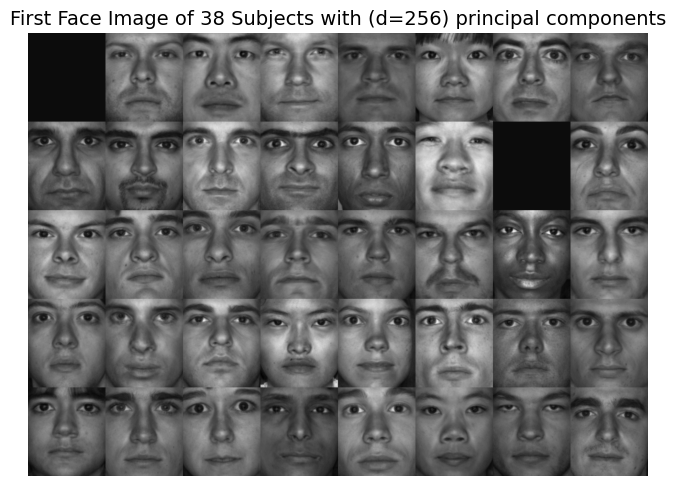

In [31]:
# Choose the number of principal components (d)
d = 256

# Projecting images onto first d principal components
reconstructed_images = PCA_on_Images(X.T, d)

# Showing reconstructed images
image_plotting(reconstructed_images.T, d)

### Part II: SVM Classification

3） To test the effectiveness of PCA dimensionality reduction train a binary linear support vector machine (SVM) to classify **subject 0** versus **subject 1**, using PCA  projected training data.

You do not need to know (yet) how the SVM works. We will cover that later. What is important for now is that it is a binary classifer with one hyperparameter $C>0$.
The first thing we need to do is select $C$. To do that project the centered training data and testing data onto the first 128 principal components of the centered training data. Then use this data to plot training accuracy vs $C$.


**Note:** Output data matrix should be 128 x N for both the training data and the testing data (in the reduced dimension).

In [32]:
# Project the centered training data and testing data onto
# the first 128 principal components of the centered training data.

# Images should be Flatten into a 2D array (number of images, height * width)
flattened_training_images = X_train.T
flattened_test_images = X_test.T

# Step 1: Centering the training and test data
mean_training_image = np.mean(flattened_training_images, axis=0)
centered_training_images = flattened_training_images - mean_training_image

# Note: The centering process for test data should be done with the same
# parameters as training data
centered_test_images = flattened_test_images - mean_training_image

# Step 2: Initialize PCA with the desired number of components
d = 128
pca = PCA(n_components=d)

# Step 3: Fit PCA to your standardized image data
pca.fit(centered_training_images)

# Steps 4: Project the images onto the first d principal components
projected_training_data = pca.transform(centered_training_images)
projected_test_data = pca.transform(centered_test_images)
print("Projected training data shape: " + str(np.shape(projected_training_data)))
print("Projected test data shape: " + str(np.shape(projected_test_data)))


Projected training data shape: (1520, 128)
Projected test data shape: (894, 128)


In [33]:
# Form the training data using subjects 0, 1

# Finding indicies of subject 0 and 1 in Y_train
indices_subject0_training = np.where(Y_train == 0)
indices_subject1_training = np.where(Y_train == 1)

# Reduce excessive dimensions
indices_subject0_training = np.squeeze(indices_subject0_training)
indices_subject1_training = np.squeeze(indices_subject1_training)

# Finding images and labels of subject 0 and 1 in reduced dimension of training data
images_subject0_training = projected_training_data[indices_subject0_training, :]
images_subject1_training = projected_training_data[indices_subject1_training, :]
binary_train = (np.vstack((images_subject0_training, images_subject1_training))).T
binary_train_label = np.concatenate((Y_train[indices_subject0_training], Y_train[indices_subject1_training]))

# Output data matrix should be 128 x N for both the training and testing data
print("Shape of training data: " + str(np.shape(binary_train)))
print("Shape of training labels: " + str(np.shape(binary_train_label)))

Shape of training data: (128, 80)
Shape of training labels: (80,)


In [36]:
# THIS PORTION OF CODE IS GIVEN TO YOU ----- uncomment to use
C_list = np.arange(-5,6, 0.01)  # I changed the step manually
accuracy_list = []
for C in C_list:
    svm_binary = svm.SVC(kernel='linear',C=10.0**C)
    svm_binary.fit(binary_train.T,binary_train_label)

    binary_train_pred = svm_binary.predict(binary_train.T)

    accuracy = np.sum(binary_train_pred==binary_train_label)/float(len(binary_train_pred))
    accuracy_list.append(accuracy)

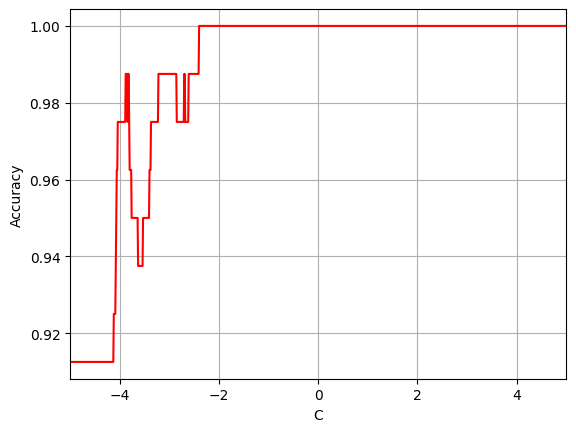

In [37]:
# Now plot the training accuracy vs C

plt.plot(C_list, accuracy_list, color='red')

# Add labels
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid()

# Set the x-axis limits to -5 and 5
plt.xlim(-5, 5)

# Display the plot
plt.show()

4）Based on the graph you obtain above select a reasonable value for $C$.
(e.g. something like $C = 10^{-2}$).

Now repeat 4) for projected training data onto $d$ principal components where $d = 8,16,32,64,128,256,512$. This time plot both the training and testing accuracy vs. $d$. Use similar ticks marks for the x and y axies as in part 4).

What do you observe? How small a dimension can you select for the projection and a still obtain > 95% training and test accuracy **ANS:** 64

As the number of components increases, the accuracy tends to increase on both training and test data. It seems that 64 components are enough for accuracy greater than 95%.

**Note:** In practice, we pick $d$ by measuring performance on a validation dataset. In addition, for each $d$ we would normally do a larger sweep of the hyperparameter $C$.

In [38]:
def PCA_on_Images2(flattened_training_images, flattened_test_images, d):

  # Project the centered training data and testing data onto
  # the first d principal components of the centered training data.

  # Images should be Flatten into a 2D array (number of images, height * width)

  # Step 1: Centering the training data
  mean_training_image = np.mean(flattened_training_images, axis=0)
  centered_training_images = flattened_training_images - mean_training_image
  centered_test_images = flattened_test_images - mean_training_image

  # Step 2: Initialize PCA with the desired number of components
  pca = PCA(n_components=d)

  # Step 3: Fit PCA to your standardized image data
  pca.fit(centered_training_images)

  # Steps 4: Project the images onto the first d principal components
  projected_training_data = pca.transform(centered_training_images)
  projected_test_data = pca.transform(centered_test_images)

  return projected_training_data, projected_test_data


In [39]:
d_list = [8, 16, 32, 64, 128, 256, 512]
accuracy_training_list = []
accuracy_test_list = []

# Finding indicies of subject 0 and 1 in X_train
indices_subject0_training = np.where(Y_train == 0)
indices_subject1_training = np.where(Y_train == 1)

# Reduce excessive dimensions
indices_subject0_training = np.squeeze(indices_subject0_training)
indices_subject1_training = np.squeeze(indices_subject1_training)

# Finding indicies of subject 0 and 1 in X_test
indices_subject0_test = np.where(Y_test == 0)
indices_subject1_test = np.where(Y_test == 1)

# Reduce excessive dimensions
indices_subject0_test = np.squeeze(indices_subject0_test)
indices_subject1_test = np.squeeze(indices_subject1_test)

for d in d_list:

  # project the centered training data and testing data onto the first d
  # principal components of the centered training data.
  projected_training_data, projected_test_data = PCA_on_Images2(X_train.T, X_test.T, d)

  # Finding images and labels of subject 0 and 1 in reduced dimension of training data
  images_subject0_training = projected_training_data[indices_subject0_training, :]
  images_subject1_training = projected_training_data[indices_subject1_training, :]
  binary_train = (np.vstack((images_subject0_training, images_subject1_training))).T
  binary_train_label = np.concatenate((Y_train[indices_subject0_training], Y_train[indices_subject1_training]))

  # Finding images and labels of subject 0 and 1 in reduced dimension of test data
  images_subject0_test = projected_test_data[indices_subject0_test, :]
  images_subject1_test = projected_test_data[indices_subject1_test, :]
  binary_test = (np.vstack((images_subject0_test, images_subject1_test))).T
  binary_test_label = np.concatenate((Y_test[indices_subject0_test], Y_test[indices_subject1_test]))


  svm_binary = svm.SVC(kernel='linear',C=0.01)
  svm_binary.fit(binary_train.T,binary_train_label)

  binary_train_pred = svm_binary.predict(binary_train.T)
  binary_test_pred = svm_binary.predict(binary_test.T)

  accuracy_training = np.sum(binary_train_pred==binary_train_label)/float(len(binary_train_pred))
  accuracy_training_list.append(accuracy_training)

  accuracy_test = np.sum(binary_test_pred==binary_test_label)/float(len(binary_test_pred))
  accuracy_test_list.append(accuracy_test)


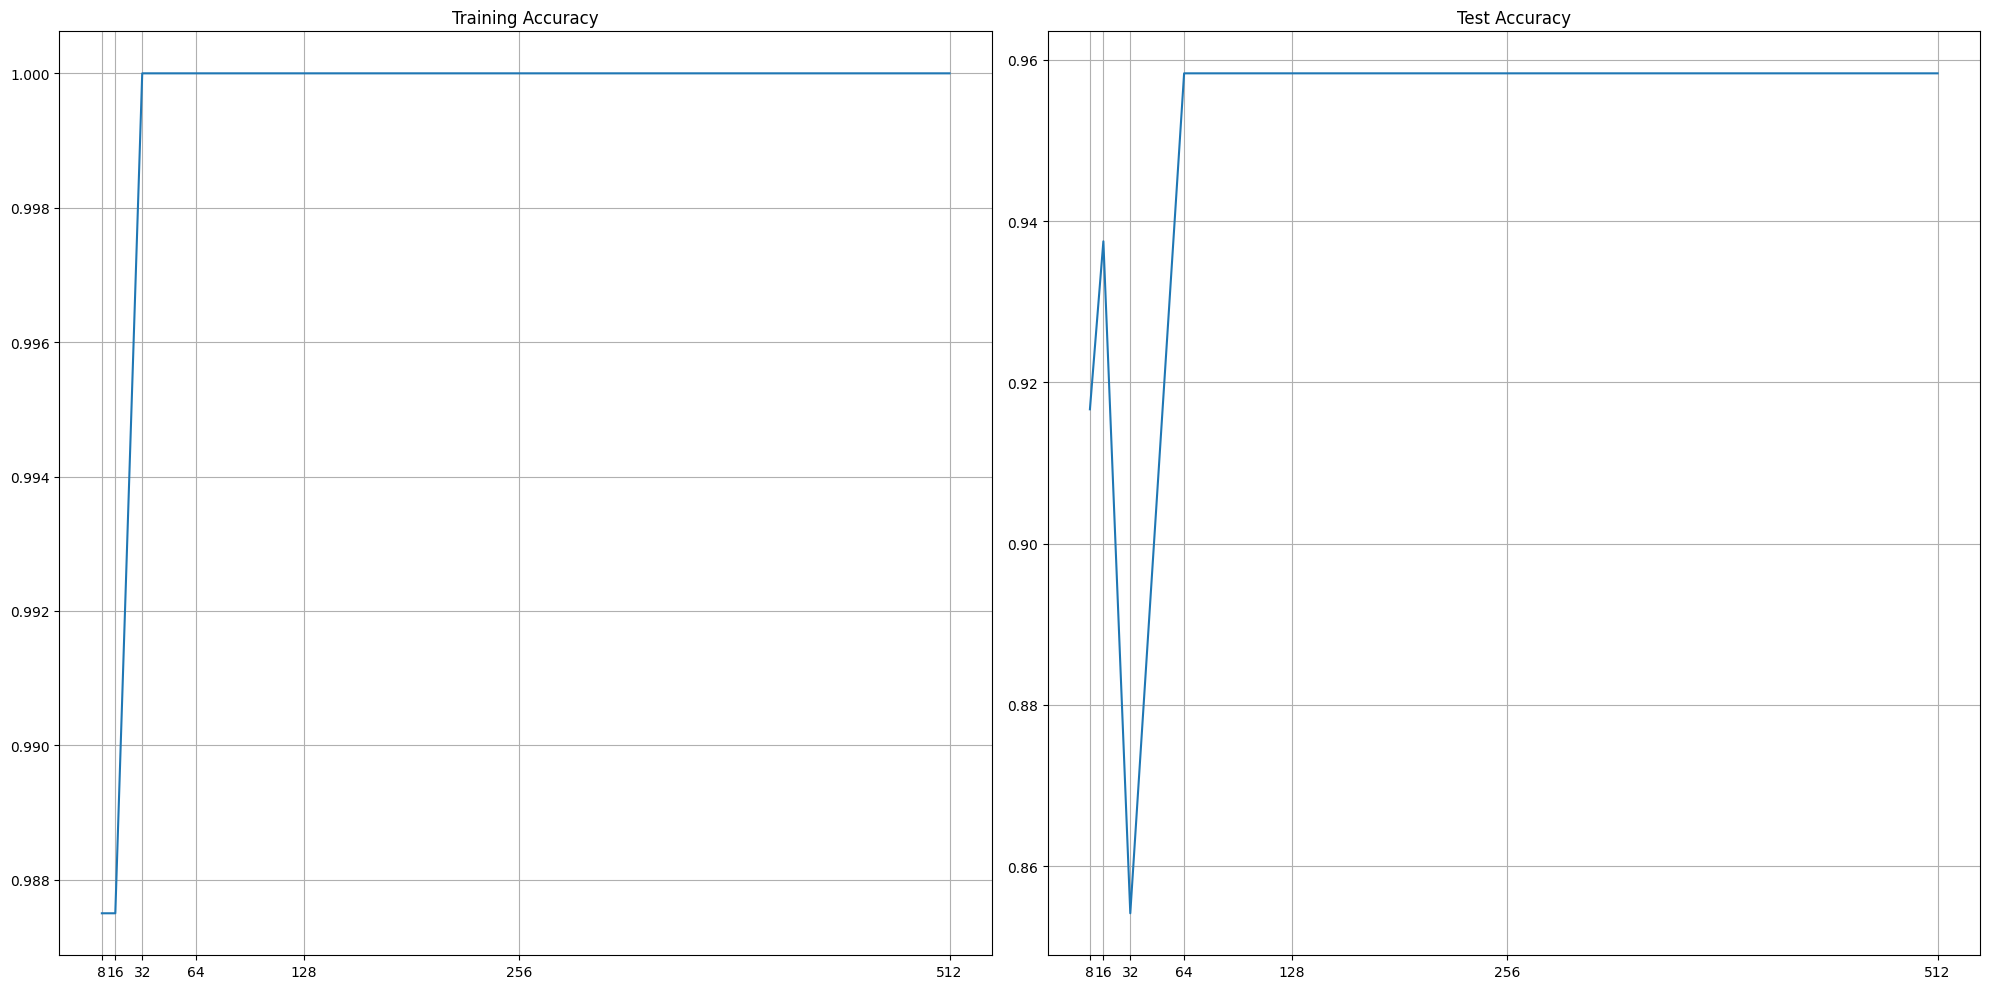

In [40]:
# Create subplots using plt.subplots()
fig, axs = plt.subplots(1, 2, figsize=(20, 10))  # 2 rows, 1 column

# Plot the first subplot
axs[0].plot(d_list, accuracy_training_list)
axs[0].set_title('Training Accuracy')
# Generate an array of x-axis tick positions at powers of 2 from 8 to 256
x_ticks = [8 * 2**i for i in range(0, 7)]  # 8, 16, 32, 64, 128, 256
axs[0].set_xticks(x_ticks)
axs[0].grid()

# Plot the second subplot
axs[1].plot(d_list, accuracy_test_list)
axs[1].set_xticks(x_ticks)
axs[1].set_title('Test Accuracy')
axs[1].grid()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()